In [10]:
from datetime import datetime
now = datetime.now()
# A function that draws a line graph from a csv file.
#count_csv = "data/"+now.strftime("%Y.%m.%d")+"-count.csv"
#rate_csv = "data/"+now.strftime("%Y.%m.%d")+"-rate.csv"

count_csv = "data/combined.csv"
rate_csv = "data/2019.11.02-rate.csv"

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
import csv

def draw_line_graph_from_csv(file_name, x_axis, y_axes=None):
    df = pd.read_csv(file_name)
    filter = [x_axis] + y_axes

    title = os.path.basename(file_name)
    df[filter].plot(x=x_axis, title=title, grid=True, rot=10, figsize=(6, 4))

In [11]:
columnNumber = 0
data = [l.split(',')[columnNumber] for l in open(rate_csv, 'r').readlines()]
def average_the_count():
    columnNumber = 0
    data.pop(0)
    sum_of_count = 0
    for value in data:
        sum_of_count += float(value)
    return sum_of_count




Statistically we will hit our goal in 11 days, 13 hours, 13 minutes and 9 seconds 



Average:
$6.33/sec 




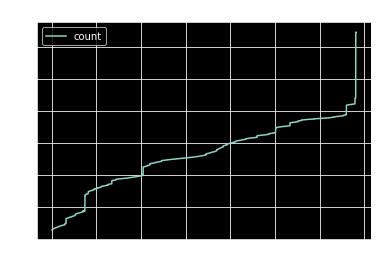

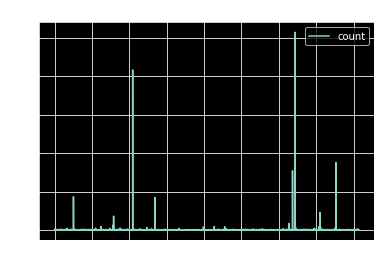

In [12]:
draw_line_graph_from_csv(count_csv, 'date', ['count'])
draw_line_graph_from_csv(rate_csv, 'date', ['count'])

with open(count_csv, 'r') as f:
    for row in reversed(list(csv.reader(f))):
        trees_now = int(row[0].split(",")[0])
        break


goal = 20000000 - trees_now
rate_total = average_the_count() / len(data)
preditction_days = (goal/rate_total)/60/60/24
preditction_hours = ((goal/rate_total)/60/60) % 24
prediction_minutes = ((goal/rate_total)/60 % 24) % 60
prediction_seconds = (goal/rate_total) %60 %60 %24

print("\n\n\nStatistically we will hit our goal in "+str(round(preditction_days)) + " days, "+str(round(preditction_hours))+" hours, "+str(round(prediction_minutes))+" minutes and "+str(round(prediction_seconds))+" seconds \n\n\n")
print("Average:\n$"+str(round(average_the_count() / len(data),2))+"/sec \n\n")

